# 7:3 Train/Test Ratio

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
#read data
df = pd.read_csv('BIDV.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,27/01/2014,11054.8,11235.1,11295.2,10874.6,4.27M,-0.02
1,06/02/2014,10574.2,10934.7,10994.8,10574.2,1.26M,-0.04
2,07/02/2014,9973.4,10454.0,10514.1,9913.3,3.93M,-0.06
3,10/02/2014,10213.7,9913.3,10333.9,9733.1,5.33M,0.02
4,11/02/2014,10153.6,10333.9,10333.9,10153.6,2.55M,-0.01
...,...,...,...,...,...,...,...
2467,18/12/2023,41000.0,41050.0,41500.0,40500.0,678.40K,-0.01
2468,19/12/2023,41200.0,41000.0,41500.0,40550.0,823.30K,0.00
2469,20/12/2023,41300.0,41900.0,42000.0,40800.0,1.02M,0.00
2470,21/12/2023,41800.0,40900.0,41900.0,40900.0,1.14M,0.01


In [4]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [5]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26509.412, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26505.484, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26507.478, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26507.480, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26505.086, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26506.921, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.415 seconds


In [25]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [27]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5
 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5
 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5 38186.5
 38186.5 38186.5 38186.5]


In [28]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 5273.64447502633
MAPE: 12.038282860765674
MSLE: 0.018423145688921762


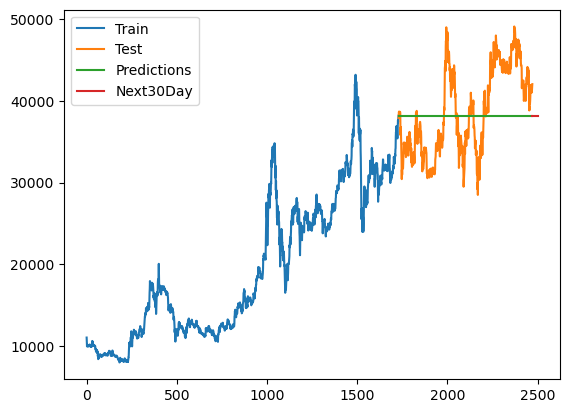

In [29]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [16]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1730
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -13251.543
Date:                Sat, 30 Dec 2023   AIC                          26505.086
Time:                        10:56:18   BIC                          26510.542
Sample:                             0   HQIC                         26507.104
                               - 1730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.657e+05   5083.653     52.265      0.000    2.56e+05    2.76e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1386.80
Prob(Q):                              0.98   Pr

In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1730
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -13251.543
Date:                Sat, 30 Dec 2023   AIC                          26505.086
Time:                        10:56:18   BIC                          26510.542
Sample:                             0   HQIC                         26507.104
                               - 1730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.657e+05   5083.653     52.265      0.000    2.56e+05    2.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1386.80
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.16   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 8:2 Train/Test Ratio

In [30]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [31]:
#read data
df = pd.read_csv('BIDV.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,27/01/2014,11054.8,11235.1,11295.2,10874.6,4.27M,-0.02
1,06/02/2014,10574.2,10934.7,10994.8,10574.2,1.26M,-0.04
2,07/02/2014,9973.4,10454.0,10514.1,9913.3,3.93M,-0.06
3,10/02/2014,10213.7,9913.3,10333.9,9733.1,5.33M,0.02
4,11/02/2014,10153.6,10333.9,10333.9,10153.6,2.55M,-0.01
...,...,...,...,...,...,...,...
2467,18/12/2023,41000.0,41050.0,41500.0,40500.0,678.40K,-0.01
2468,19/12/2023,41200.0,41000.0,41500.0,40550.0,823.30K,0.00
2469,20/12/2023,41300.0,41900.0,42000.0,40800.0,1.02M,0.00
2470,21/12/2023,41800.0,40900.0,41900.0,40900.0,1.14M,0.01


In [32]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [33]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30481.978, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30476.601, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30478.387, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30478.400, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30475.612, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30480.213, Time=0.47 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.010 seconds


In [38]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [39]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200.
 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200.
 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200.]


In [40]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 7547.18992457297
MAPE: 15.11521245335072
MSLE: 0.03618282440018551


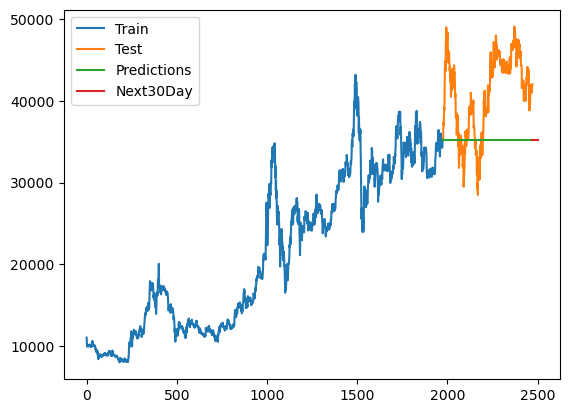

In [41]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# 9:1 Train/Test Ratio

In [42]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [43]:
#read data
df = pd.read_csv('BIDV.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,27/01/2014,11054.8,11235.1,11295.2,10874.6,4.27M,-0.02
1,06/02/2014,10574.2,10934.7,10994.8,10574.2,1.26M,-0.04
2,07/02/2014,9973.4,10454.0,10514.1,9913.3,3.93M,-0.06
3,10/02/2014,10213.7,9913.3,10333.9,9733.1,5.33M,0.02
4,11/02/2014,10153.6,10333.9,10333.9,10153.6,2.55M,-0.01
...,...,...,...,...,...,...,...
2467,18/12/2023,41000.0,41050.0,41500.0,40500.0,678.40K,-0.01
2468,19/12/2023,41200.0,41000.0,41500.0,40550.0,823.30K,0.00
2469,20/12/2023,41300.0,41900.0,42000.0,40800.0,1.02M,0.00
2470,21/12/2023,41800.0,40900.0,41900.0,40900.0,1.14M,0.01


In [44]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [45]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34849.146, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34841.835, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34843.170, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34843.178, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34840.759, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=34845.163, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.634 seconds


In [46]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [47]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800.
 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800.
 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800. 38800.]


In [48]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 5854.336516496733
MAPE: 12.034324642123648
MSLE: 0.01932251940232176


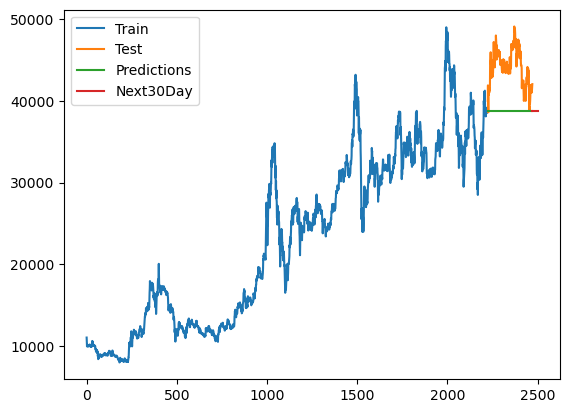

In [49]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()